# Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
!pip install imbalanced-learn==0.6.0



#  data description

About this file
Attribute Information:

ID : Customer ID

Age : Customer's age in completed years

Experience : #years of professional experience

Income : Annual income of the customer ($000)

ZIP Code : Home Address ZIP code.

Family : Family size of the customer

CCAvg : Avg. spending on credit cards per month ($000)

Education : Education Level.
1: Undergrad;
2: Graduate;
3: Advanced/Professional

Mortgage : Value of house mortgage if any. ($000)

10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11.Securities Account : Does the customer have a securities account with the bank?

12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13.Online : Does the customer use internet banking facilities?

14.Credit card : Does the customer use a credit card

In [5]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [6]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [7]:
df.rename(columns ={"CCAvg": "Monthly_Avg_CC_Spending", 
                    "ZIP Code": "ZIP_Code",
                    "Personal Loan": "Personal_Loan_Offer",
                    "Securities Account": "Securities_Account",
                    "CD Account": "CD_Account"}, inplace = True)
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,Monthly_Avg_CC_Spending,Education,Mortgage,Personal_Loan_Offer,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# EDA Analysis

#### There are no missing and duplicate values in the dataset.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Experience               5000 non-null   int64  
 3   Income                   5000 non-null   int64  
 4   ZIP_Code                 5000 non-null   int64  
 5   Family                   5000 non-null   int64  
 6   Monthly_Avg_CC_Spending  5000 non-null   float64
 7   Education                5000 non-null   int64  
 8   Mortgage                 5000 non-null   int64  
 9   Personal_Loan_Offer      5000 non-null   int64  
 10  Securities_Account       5000 non-null   int64  
 11  CD_Account               5000 non-null   int64  
 12  Online                   5000 non-null   int64  
 13  CreditCard               5000 non-null   int64  
dtypes: float64(1), int64(13)

In [6]:
df.isnull().sum()

ID                         0
Age                        0
Experience                 0
Income                     0
ZIP_Code                   0
Family                     0
Monthly_Avg_CC_Spending    0
Education                  0
Mortgage                   0
Personal_Loan_Offer        0
Securities_Account         0
CD_Account                 0
Online                     0
CreditCard                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,Monthly_Avg_CC_Spending,Education,Mortgage,Personal_Loan_Offer,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### One-hot Encoding


In [8]:
df["Undergrad_Edu_Level"]    = df["Education"].apply(lambda x:1 if x==1 else 0)
df["Graduate_Edu_Level"]     = df["Education"].apply(lambda x:1 if x==2 else 0)
df["Professional_Edu_Level"] = df["Education"].apply(lambda x:1 if x==3 else 0)
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,Monthly_Avg_CC_Spending,Education,Mortgage,Personal_Loan_Offer,Securities_Account,CD_Account,Online,CreditCard,Undergrad_Edu_Level,Graduate_Edu_Level,Professional_Edu_Level
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,1,0


### Descriptive Statistics
#####  Income has a high std #####
##### Monthly_Avg_CC_Spending as almost already normal distribution shape #####
##### There are negative values in experience #####

In [9]:
df.columns
df_list = df[["Age","Experience","Income","Family","Monthly_Avg_CC_Spending","Mortgage"]]
df_list.head(10)
df_list.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
Monthly_Avg_CC_Spending,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [10]:
df.loc[df["Experience"]<0]
df.loc[df["Experience"]<0].count() ## 52 observations

ID                         52
Age                        52
Experience                 52
Income                     52
ZIP_Code                   52
Family                     52
Monthly_Avg_CC_Spending    52
Education                  52
Mortgage                   52
Personal_Loan_Offer        52
Securities_Account         52
CD_Account                 52
Online                     52
CreditCard                 52
Undergrad_Edu_Level        52
Graduate_Edu_Level         52
Professional_Edu_Level     52
dtype: int64

In [12]:
# mean and median are almost already the same
df_pst_exp = df.loc[df['Experience'] > 0]
df_pst_exp_mean = df_pst_exp["Experience"].mean() # 20.61
df_pst_exp_median = df_pst_exp["Experience"].median() # 21
print(df_pst_exp_mean)
print(df_pst_exp_median)

20.60589922163048
21.0


In [13]:

# Step 1: Group data by column 'Age'
grouped = df.groupby(by='Age')

# Step 2: Define a custom function to replace negative values with the mean of positive values for each group
def replace_with_mean(group):
    # Select positive values in the group
    mask = group > 0
    # Calculate the mean of positive values
    mean = group[mask].mean()
    # Replace negative values with the mean
    group[~mask] = mean
    return group

# Step 3: Apply the custom function to each group
df['Experience'] = grouped['Experience'].apply(replace_with_mean)

# Step 4: Replace NA values with 0
df = df.fillna(0)

display(df.head())


,ID,Age,Experience,Income,ZIP_Code,Family,Monthly_Avg_CC_Spending,Education,Mortgage,Personal_Loan_Offer,Securities_Account,CD_Account,Online,CreditCard,Undergrad_Edu_Level,Graduate_Edu_Level,Professional_Edu_Level
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0,1,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0,1,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0,1,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0,0,1,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1,0,1,0


#### Converting the average credit card spengind from monthly average to annual average like income column.
#### There is no relation between ID columns or ZIP Code coulumn and any ather variable.

In [14]:
df['Ann_Avg_CC_Spending'] = df['Monthly_Avg_CC_Spending'] * 12
df.drop(['ID', 'ZIP_Code','Monthly_Avg_CC_Spending'], axis = 1, inplace=True)
df.head()

,Age,Experience,Income,Family,Education,Mortgage,Personal_Loan_Offer,Securities_Account,CD_Account,Online,CreditCard,Undergrad_Edu_Level,Graduate_Edu_Level,Professional_Edu_Level,Ann_Avg_CC_Spending
0,25,1.0,49,4,1,0,0,1,0,0,0,1,0,0,19.2
1,45,19.0,34,3,1,0,0,1,0,0,0,1,0,0,18.0
2,39,15.0,11,1,1,0,0,0,0,0,0,1,0,0,12.0
3,35,9.0,100,1,2,0,0,0,0,0,0,0,1,0,32.4
4,35,8.0,45,4,2,0,0,0,0,0,1,0,1,0,12.0


In [15]:
df.corr()

,Age,Experience,Income,Family,Education,Mortgage,Personal_Loan_Offer,Securities_Account,CD_Account,Online,CreditCard,Undergrad_Edu_Level,Graduate_Edu_Level,Professional_Edu_Level,Ann_Avg_CC_Spending
Age,1.000000,0.994240,-0.055269,-0.046418,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,-0.027770,-0.016264,0.045838,-0.052012
Experience,0.994240,1.000000,-0.047124,-0.051612,0.015048,-0.011254,-0.007789,-0.001250,0.009734,0.013317,0.008943,-0.004472,-0.018303,0.022756,-0.049911
Income,-0.055269,-0.047124,1.000000,-0.157501,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,0.218019,-0.128364,-0.108878,0.645984
Family,-0.046418,-0.051612,-0.157501,1.000000,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.118628,0.139201,-0.008744,-0.109275
Education,0.041334,0.015048,-0.187524,0.064929,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014,-0.891261,0.088499,0.872731,-0.136124
Mortgage,-0.012539,-0.011254,0.206806,-0.020445,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,0.042841,-0.031806,-0.014942,0.109905
Personal_Loan_Offer,-0.007726,-0.007789,0.502462,0.061367,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,-0.148894,0.071491,0.090212,0.366889
Securities_Account,-0.000436,-0.001250,-0.002616,0.019994,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,0.006863,0.005134,-0.012421,0.015086
CD_Account,0.008043,0.009734,0.169738,0.014110,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,-0.014630,0.006089,0.009780,0.136534
Online,0.013702,0.013317,0.014206,0.010354,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210,0.003394,0.020590,-0.023837,-0.003611


### Correlation Analysis
#### There is a almost perfect correlation between Experience and Age.
#### The correlation between income, monthly average credit card spending, and deposit accounts might seem meaningful. 

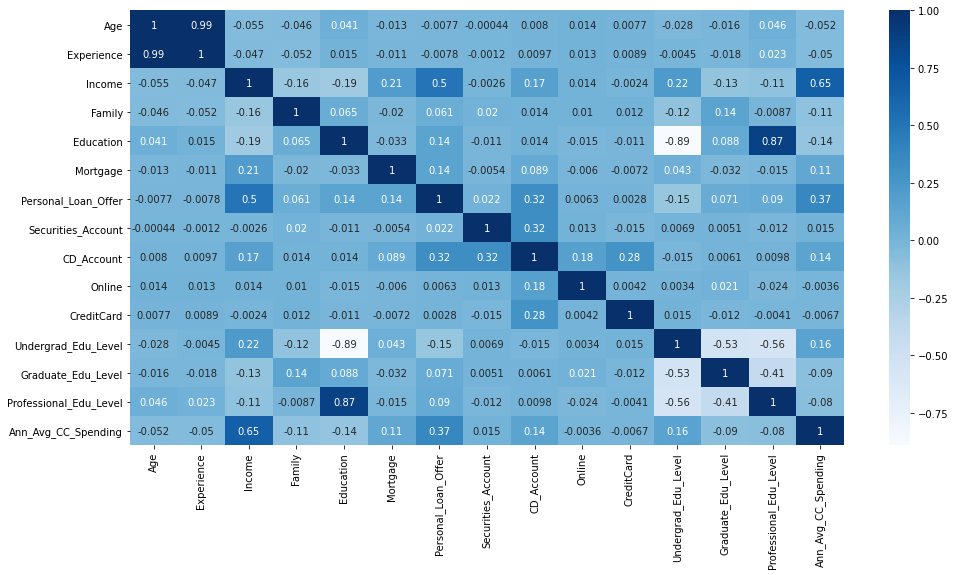

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

# Comments
'Age' and 'Experience' are correlated with each other.

'Income' and ‘Ann_Avg_CC_Spending' correlated with each other.

'CD_Account' has a correlation with 'Credit_Card', 'Securities Account', 'Online', ‘ann_CCAvg' and 'Income'.

'Personal_Loan_Offer' has correlation with 'Income’, 'Ann_Avg_CC_Spending', 'CD_Account', 'Mortgage', and 'Education'.

'Mortgage' has moderate correlation with 'Income'

'Income' influences ‘Ann_Avg_CC_Spending', 'Personal_Loan_Offer', 'CD_Account' and 'Mortgage'.


In [112]:
#only 9% of customers accepted the loan offer.
df.Personal_Loan_Offer.value_counts()
df.Personal_Loan_Offer.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan_Offer, dtype: float64

In [113]:
df.head()

,Age,Experience,Income,Family,Education,Mortgage,Personal_Loan_Offer,Securities_Account,CD_Account,Online,CreditCard,Undergrad_Edu_Level,Graduate_Edu_Level,Professional_Edu_Level,Ann_Avg_CC_Spending
0,25,1.0,49,4,1,0,0,1,0,0,0,1,0,0,19.2
1,45,19.0,34,3,1,0,0,1,0,0,0,1,0,0,18.0
2,39,15.0,11,1,1,0,0,0,0,0,0,1,0,0,12.0
3,35,9.0,100,1,2,0,0,0,0,0,0,0,1,0,32.4
4,35,8.0,45,4,2,0,0,0,0,0,1,0,1,0,12.0


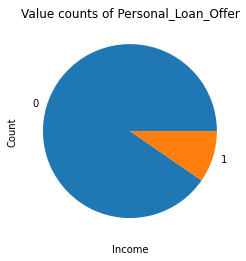

In [120]:
df.Personal_Loan_Offer.value_counts().plot(kind="pie")
plt.title("Value counts of Personal_Loan_Offer")
plt.xlabel("Income")
plt.xticks(rotation=1)
plt.ylabel("Count")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Income'>

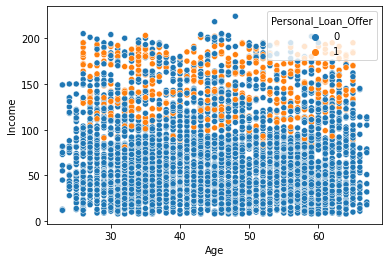

In [118]:
c = ["red","blue"]
sns.scatterplot(x = 'Age', y = 'Income', data = df, c=c, hue = 'Personal_Loan_Offer')

Clients with income more than 100k are more likely to get loan

<AxesSubplot:xlabel='Age', ylabel='Ann_Avg_CC_Spending'>

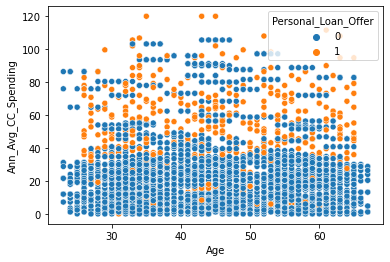

In [122]:
sns.scatterplot(x = 'Age', y = 'Ann_Avg_CC_Spending', data = df, hue = 'Personal_Loan_Offer')

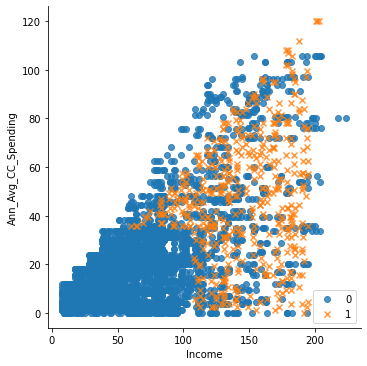

In [134]:
sns.lmplot(x = "Income", y="Ann_Avg_CC_Spending", data=df, fit_reg = False, hue="Personal_Loan_Offer",
        legend = False, markers =["o","x"] )
plt.legend(loc="lower right")
plt.show()

Clients with annual CC spending average more than 30 are more likely to get loan

<AxesSubplot:xlabel='Experience', ylabel='count'>

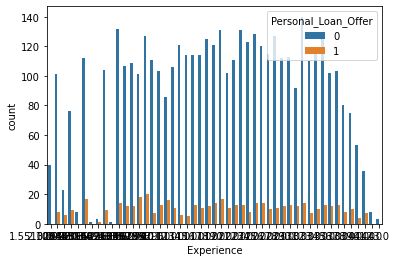

In [123]:
sns.countplot(x='Experience', hue = 'Personal_Loan_Offer', data = df)

<AxesSubplot:xlabel='Family', ylabel='count'>

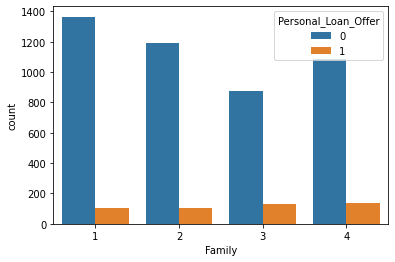

In [124]:
sns.countplot(x='Family', hue = 'Personal_Loan_Offer', data = df)

As it seems in previous two graph the Family and Experience has a low effect in the personal loan attribute

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

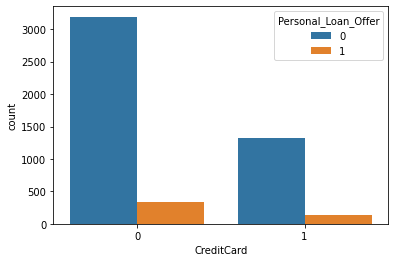

In [126]:
sns.countplot(x='CreditCard', hue = 'Personal_Loan_Offer', data = df)

<AxesSubplot:xlabel='Securities_Account', ylabel='count'>

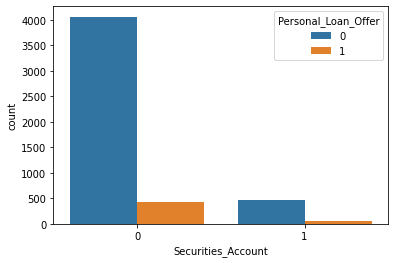

In [127]:
sns.countplot(x='Securities_Account', hue = 'Personal_Loan_Offer', data = df)

<AxesSubplot:xlabel='CD_Account', ylabel='count'>

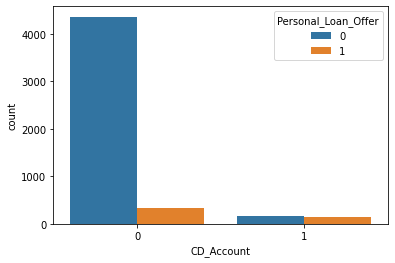

In [128]:
sns.countplot(x='CD_Account', hue = 'Personal_Loan_Offer', data = df)

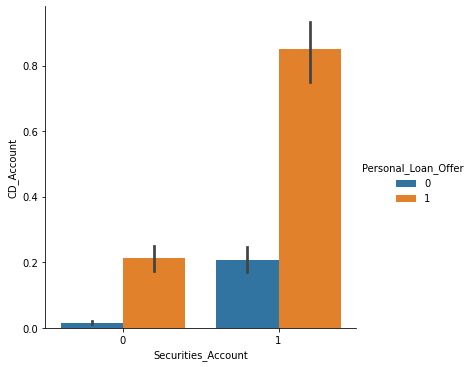

In [129]:
sns.catplot(x='Securities_Account', y = 'CD_Account', data = df, kind = 'bar', hue = 'Personal_Loan_Offer' )

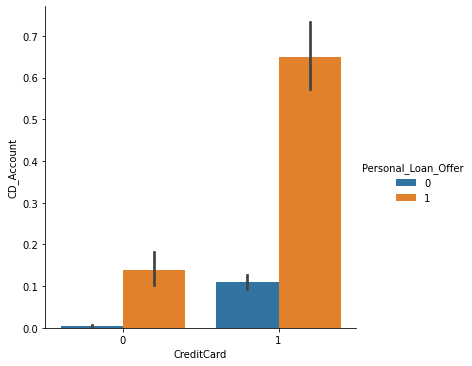

In [130]:
sns.catplot(x='CreditCard', y = 'CD_Account', data = df, kind = 'bar', hue = 'Personal_Loan_Offer' )

After investigating previous plots, after drop the 'ID' and 'ZIP Code' coulmns have influence on each other

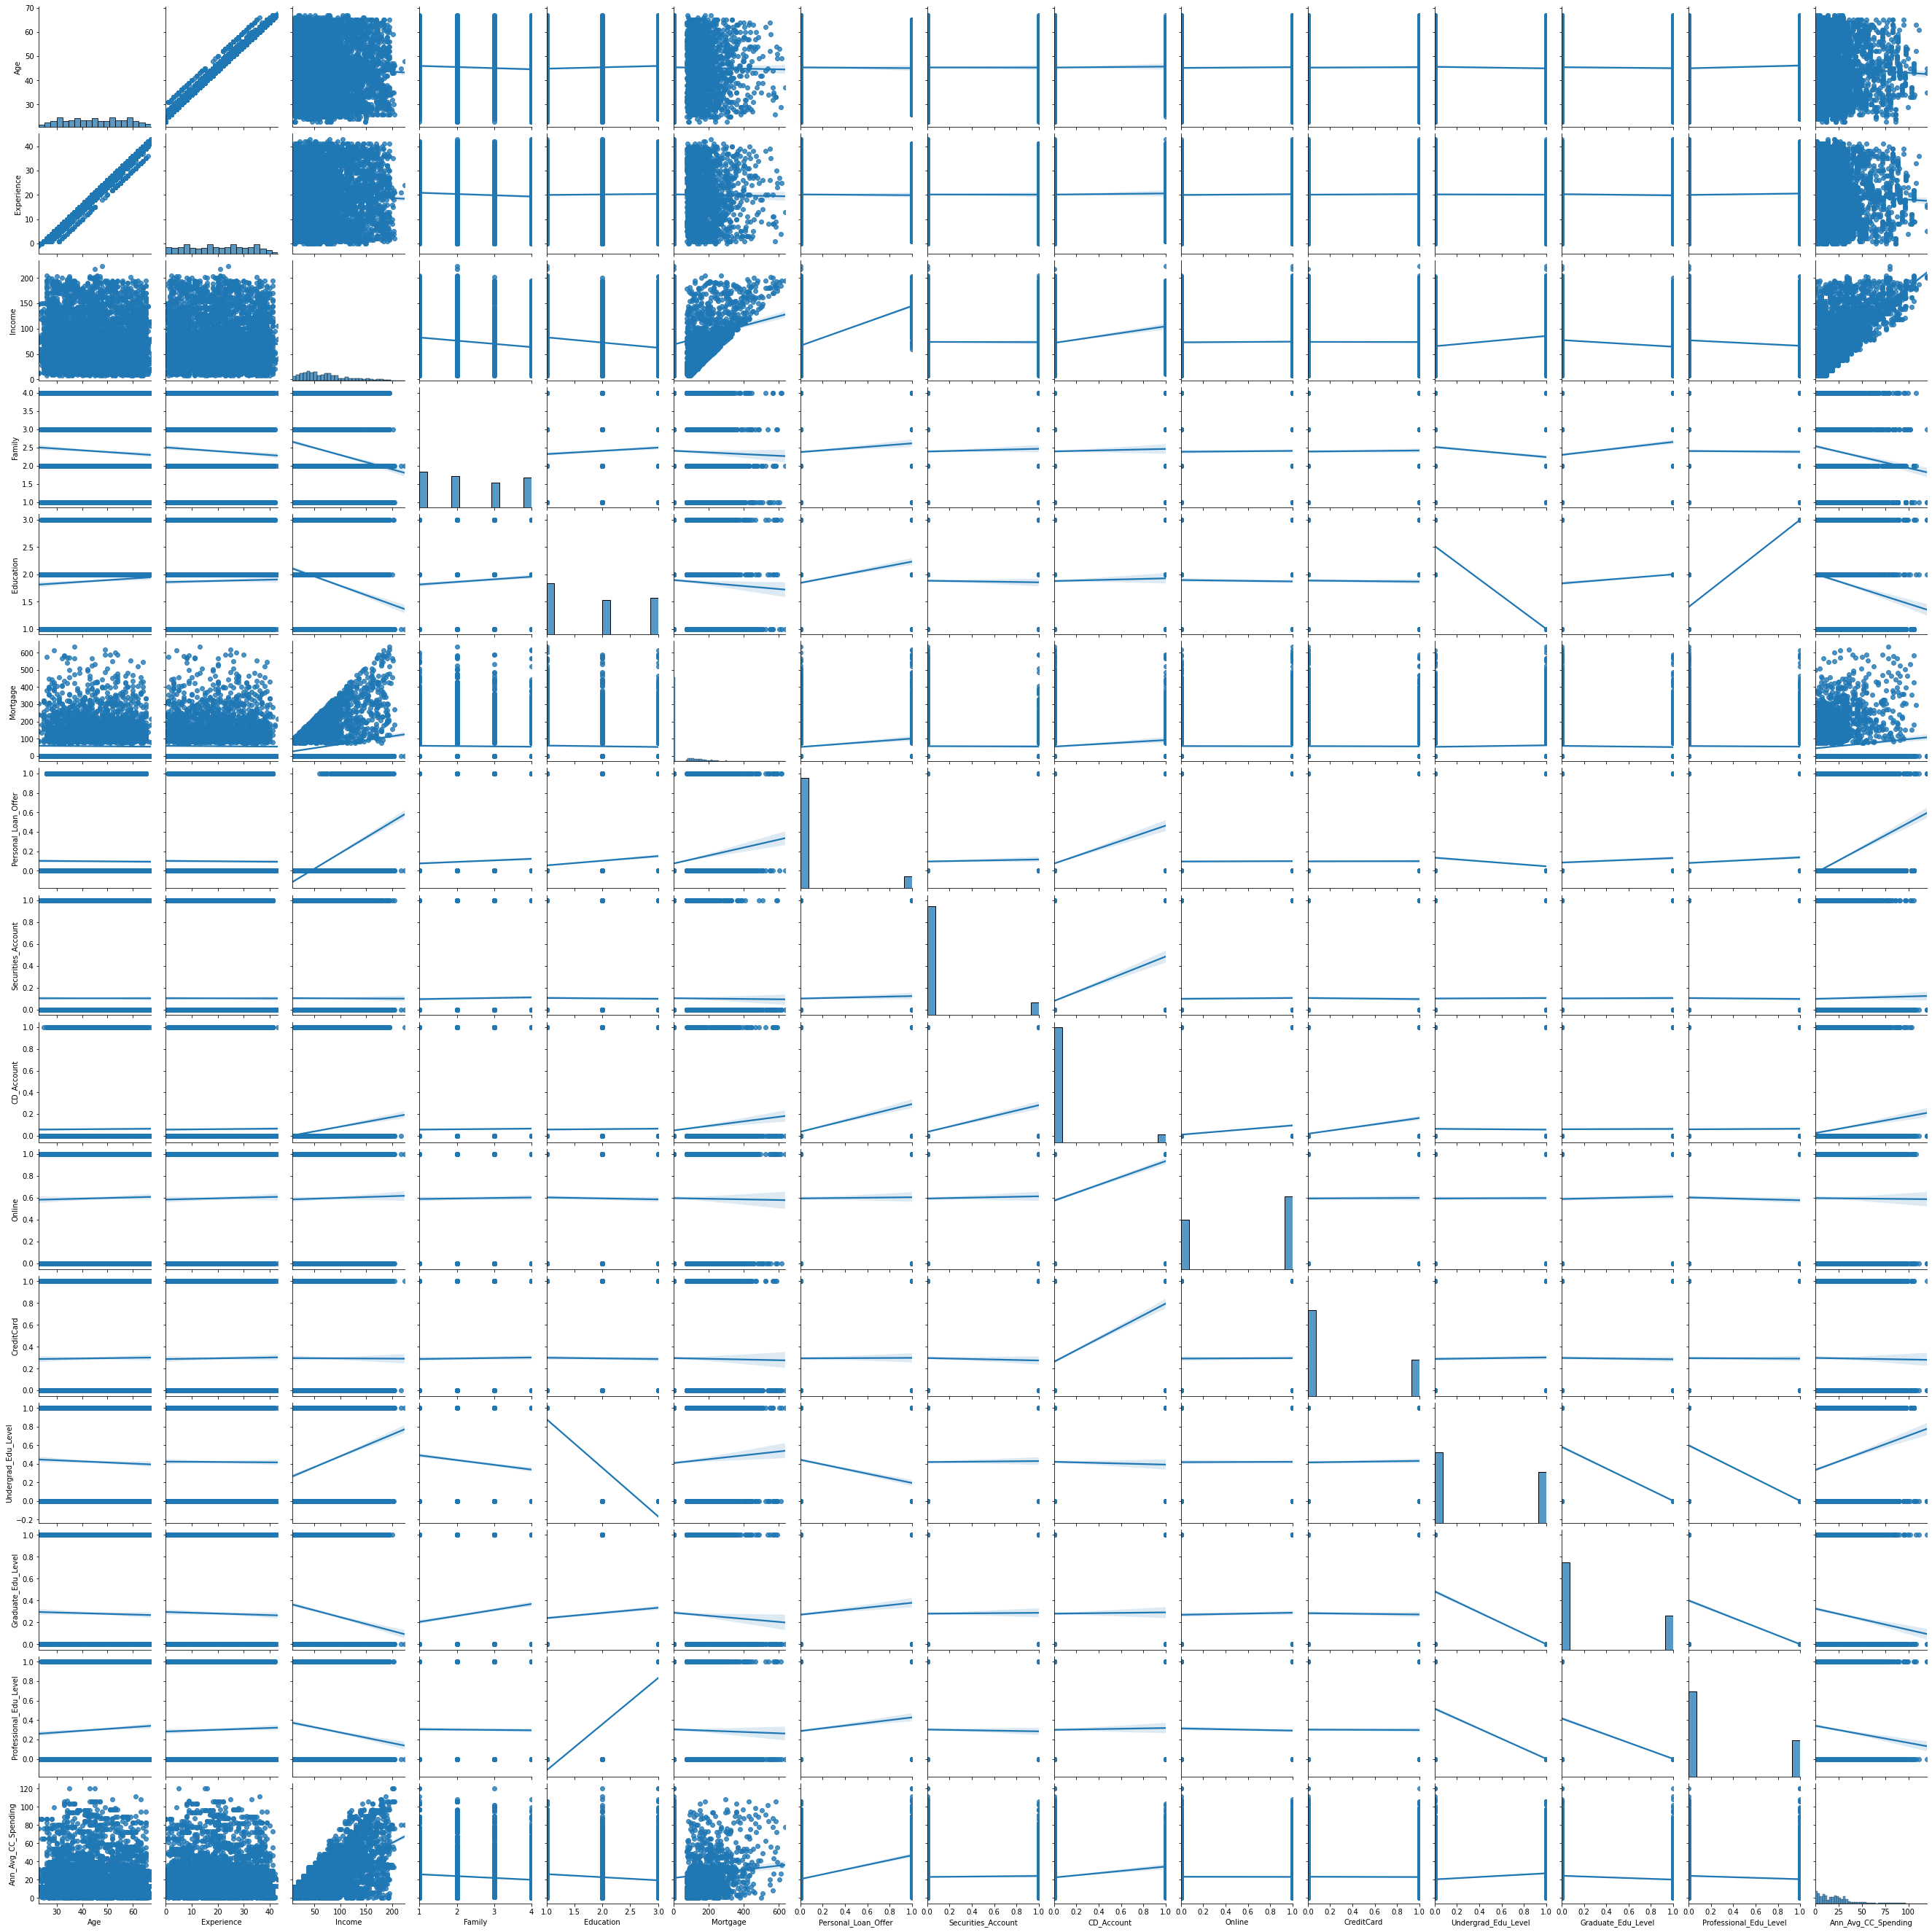

In [131]:
# with regression
sns.pairplot(df, kind="reg")
plt.show()

 
# without regression
sns.pairplot(df, kind="scatter")
plt.show()

In [135]:
df_desc = df[["Age","Experience","Income","Family","Ann_Avg_CC_Spending","Mortgage",
             "Securities_Account","CD_Account","Online","CreditCard","Personal_Loan_Offer"]]

In [136]:
df_desc.groupby("Personal_Loan_Offer").describe()

Age                                                \
                      count       mean        std   min   25%   50%   75%   
Personal_Loan_Offer                                                         
0                    4520.0  45.367257  11.450427  23.0  35.0  45.0  55.0   
1                     480.0  45.066667  11.590964  26.0  35.0  45.0  55.0   

                          Experience                                         \
                      max      count       mean        std  min   25%   50%   
Personal_Loan_Offer                                                           
0                    67.0     4520.0  20.172576  11.386318  0.0  10.0  20.0   
1                    65.0      480.0  19.871191  11.537860  1.0   9.0  20.0   

                                 Income                                      \
                      75%   max   count        mean        std   min    25%   
Personal_Loan_Offer                                                           
0                    30.0  43.0  4520.0   66.237389  40.578534   8.0   35.0   
1                    30.0  41.0   480.0  144.745833  31.584429  60.0  122.0   

                                          Family                           \
                       50%    75%    max   count      mean       std  min   
Personal_Loan_Offer                                                         
0                     59.0   84.0  224.0  4520.0  2.373451  1.148771  1.0   
1                    142.5  172.0  203.0   480.0  2.612500  1.115393  1.0   

                                        Ann_Avg_CC_Spending             \
                     25%  50%  75%  max               count       mean   
Personal_Loan_Offer                                                      
0                    1.0  2.0  3.0  4.0              4520.0  20.748106   
1                    2.0  3.0  4.0  4.0               480.0  46.864250   

                                                              Mortgage  \
                           std  min   25%   50%    75%    max    count   
Personal_Loan_Offer                                                      
0                    18.811768  0.0   7.2  16.8  27.60  105.6   4520.0   
1                    25.172174  0.0  31.2  45.6  64.17  120.0    480.0   

                                                                          \
                           mean         std  min  25%  50%    75%    max   
Personal_Loan_Offer                                                        
0                     51.789381   92.038931  0.0  0.0  0.0   98.0  635.0   
1                    100.845833  160.847862  0.0  0.0  0.0  192.5  617.0   

                    Securities_Account                                     \
                                 count      mean       std  min  25%  50%   
Personal_Loan_Offer                                                         
0                               4520.0  0.102212  0.302961  0.0  0.0  0.0   
1                                480.0  0.125000  0.331064  0.0  0.0  0.0   

                              CD_Account                                     \
                     75%  max      count      mean       std  min  25%  50%   
Personal_Loan_Offer                                                           
0                    0.0  1.0     4520.0  0.035841  0.185913  0.0  0.0  0.0   
1                    0.0  1.0      480.0  0.291667  0.455004  0.0  0.0  0.0   

                               Online                                          \
                     75%  max   count      mean       std  min  25%  50%  75%   
Personal_Loan_Offer                                                             
0                    0.0  1.0  4520.0  0.595796  0.490792  0.0  0.0  1.0  1.0   
1                    1.0  1.0   480.0  0.606250  0.489090  0.0  0.0  1.0  1.0   

                         CreditCard                                          \
                     max      count      mean       std  min  25%  50%

In [137]:
df.groupby("Personal_Loan_Offer").mean()

,Age,Experience,Income,Family,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Undergrad_Edu_Level,Graduate_Edu_Level,Professional_Edu_Level,Ann_Avg_CC_Spending
Personal_Loan_Offer,,,,,,,,,,,,,,
0,45.367257,20.172576,66.237389,2.373451,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584,0.443142,0.270133,0.286726,20.748106
1,45.066667,19.871191,144.745833,2.612500,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917,0.193750,0.379167,0.427083,46.864250


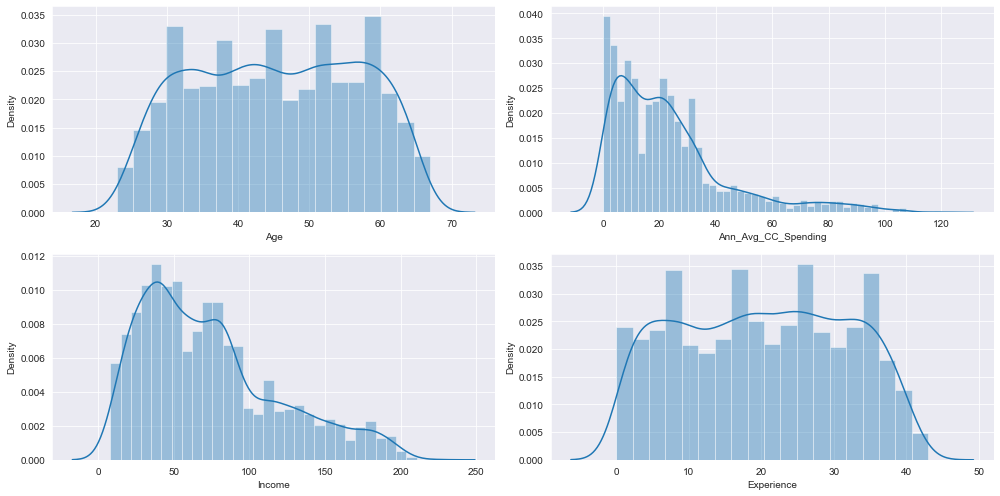

In [237]:
fig, axes = plt.subplots(2,2, figsize=(14,7))
sns.distplot(df['Age'], ax=axes[0,0])
sns.distplot(df['Ann_Avg_CC_Spending'], ax=axes[0,1])
sns.distplot(df['Income'], ax=axes[1,0])
sns.distplot(df['Experience'], ax=axes[1,1])
fig.tight_layout()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64


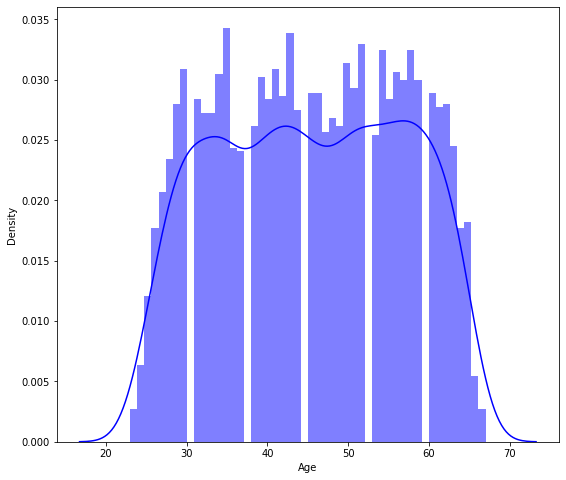

In [138]:
print(df['Age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Age'], color='b', bins=50, hist_kws={'alpha': 0.5});

count    5000.000000
mean       23.255256
std        20.971908
min         0.000000
25%         8.400000
50%        18.000000
75%        30.000000
max       120.000000
Name: Ann_Avg_CC_Spending, dtype: float64


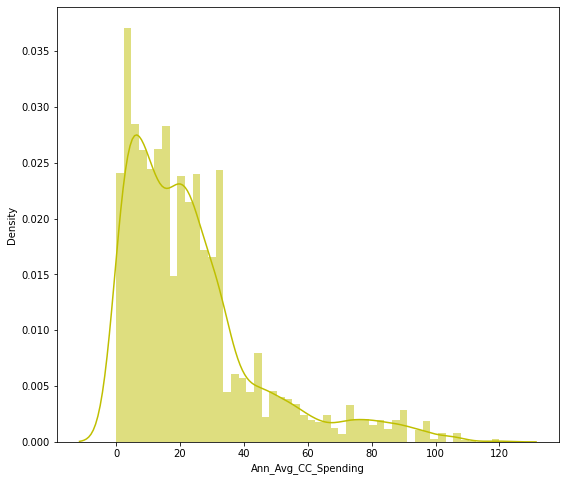

In [141]:
print(df['Ann_Avg_CC_Spending'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Ann_Avg_CC_Spending'], color='y', bins=50, hist_kws={'alpha': 0.5});

count    5000.000000
mean       20.143643
std        11.400134
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


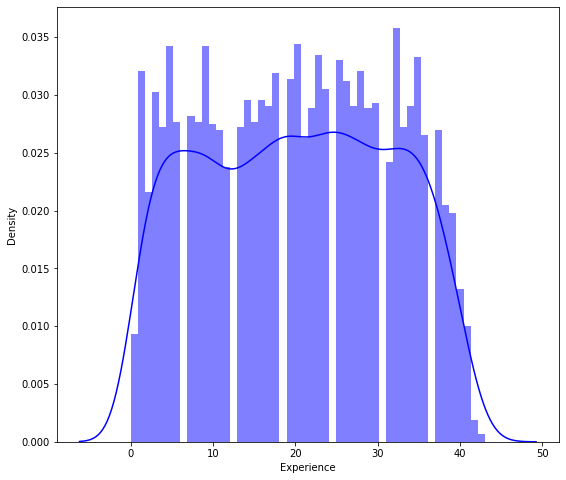

In [142]:
print(df['Experience'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Experience'], color='b', bins=50, hist_kws={'alpha': 0.5});

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


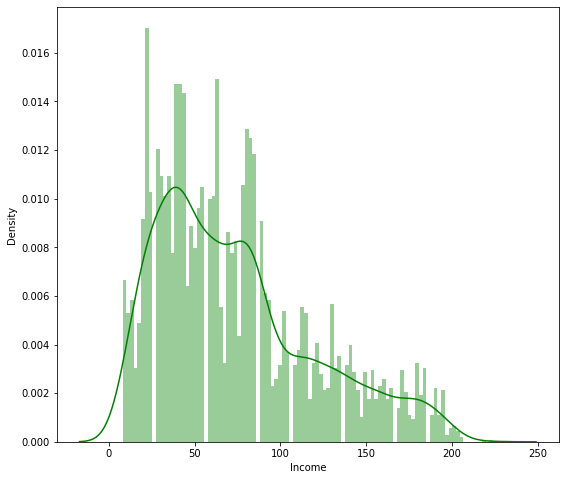

In [143]:
print(df['Income'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Income'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [144]:
df_corr = df.corr()['Personal_Loan_Offer'][:-1] 
golden_features_list = df_corr[abs(df_corr) >= 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with Personal_Loan_offer:\n{}".format(len(golden_features_list),
                                                                                    golden_features_list))

There is 3 strongly correlated values with Personal_Loan_offer:
Personal_Loan_Offer    1.000000
Income                 0.502462
CD_Account             0.316355
Name: Personal_Loan_Offer, dtype: float64


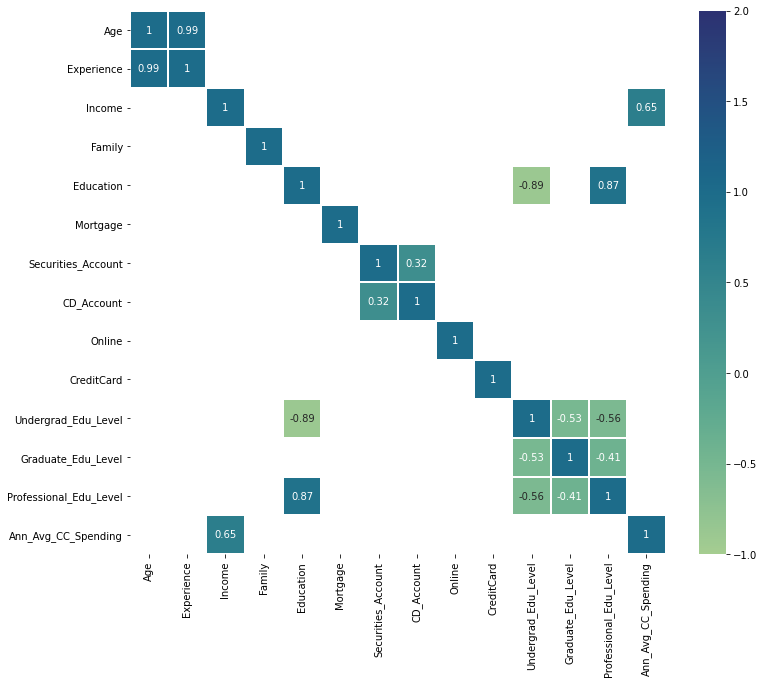

In [145]:
corr = df.drop('Personal_Loan_Offer', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='crest', vmax=2.0, vmin=-1.0, linewidths=0.3,
            annot=True, annot_kws={"size": 10}, square=False);

### Splitting the Data
##### Training and Testing Set in the ratio of 70:30

In [240]:

X = df.drop('Personal_Loan_Offer', axis = 1)
y = df['Personal_Loan_Offer']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=34)

# X_train.shape, X_test.shape
print("Training Dataset Shape:",X_train.shape)
r, c = X_train.shape
print("Rows= ",r )
print("Columns= ",c)
print("Testing Dataset Shape:",X_test.shape)
r, c = X_test.shape
print("Rows= ",r )
print("Columns= ",c)

Training Dataset Shape: (3500, 14)
Rows=  3500
Columns=  14
Testing Dataset Shape: (1500, 14)
Rows=  1500
Columns=  14


#### Determine Mutual Information
##### Calculate the mutual information between the variables and the target. The smaller the value of MI, the less information we can infer from the feature about the target.

In [148]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.        , 0.        , 0.14036052, 0.00337706, 0.02788648,
       0.0059517 , 0.        , 0.0237423 , 0.0077015 , 0.        ,
       0.02094015, 0.00586169, 0.00267418, 0.09354648])

Let's capture the above array in a pandas series add the variable names in the index sort the features based on their mutual information value and make a plot

Text(0, 0.5, 'Mutual Information')

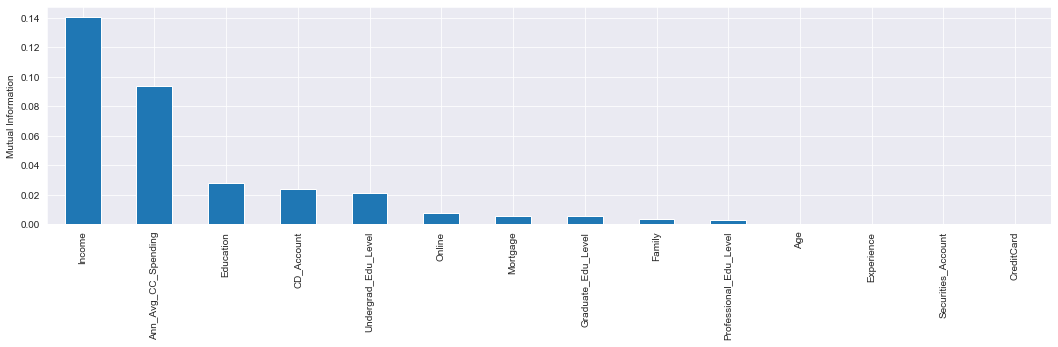

In [241]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(18, 4))
plt.ylabel('Mutual Information')

The  features of left of the plot have higher mutual information values whereas features of the right of the plot have almost zero mutual information (mi) values.

To determine a threshold or cut-off value for the mutual information values in order to select features

To determine a treshold, select top k features, where k is an arbitrary number of features

### Select top k features based on Mutual Information¶
#### Here we will select the top 8 features based on their mutual information value

In [243]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=8).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['Age', 'Experience', 'Income', 'Education', 'Mortgage', 'CD_Account',
       'Undergrad_Edu_Level', 'Ann_Avg_CC_Spending'],
      dtype='object')

In [244]:
# X_train.shape,X_test.shape
r, c = X_train.shape
print("Train Dataset:")
print("Rows=",r)
print("Column=",c)
r, c = X_test.shape
print("Test Dataset:")
print("Rows=",r)
print("Column=",c)

Train Dataset:
Rows= 3500
Column= 14
Test Dataset:
Rows= 1500
Column= 14


### SMOTE
Here we can see the data is Unbalance. The lable which contain '0' is greater than the label containg '1'.

So here we need to Balance the dataset in this way, the model gets train in similar ways on both the labels.

In [245]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 3155 



In [246]:

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of X_train: (6310, 14)
After OverSampling, the shape of y_train: (6310,) 

After OverSampling, counts of label '1': 3155
After OverSampling, counts of label '0': 3155


In [247]:
#checking the length of the Training data before balancing
print(len(X_train))

3500


In [248]:
#checking the length of the Test data after balancing
print(len(X_train_res))

6310


# Algorithm
On our work we will use five kind of algorithms to the find algorithm with highest f1_score

#### LogisticRegression
#### SVM
#### K-NN
#### DecisionTreeClassifier
#### RandomForestClassifier

###  Logestic Regression

In [249]:
classifier = LogisticRegression(random_state = 34)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=34)

In [250]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train_res, y_train_res)

predictions = lr.predict(X_test)

#import classification report
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1365
           1       0.63      0.79      0.70       135

    accuracy                           0.94      1500
   macro avg       0.80      0.87      0.83      1500
weighted avg       0.95      0.94      0.94      1500



In [251]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [252]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1347   18]
 [  43   92]]


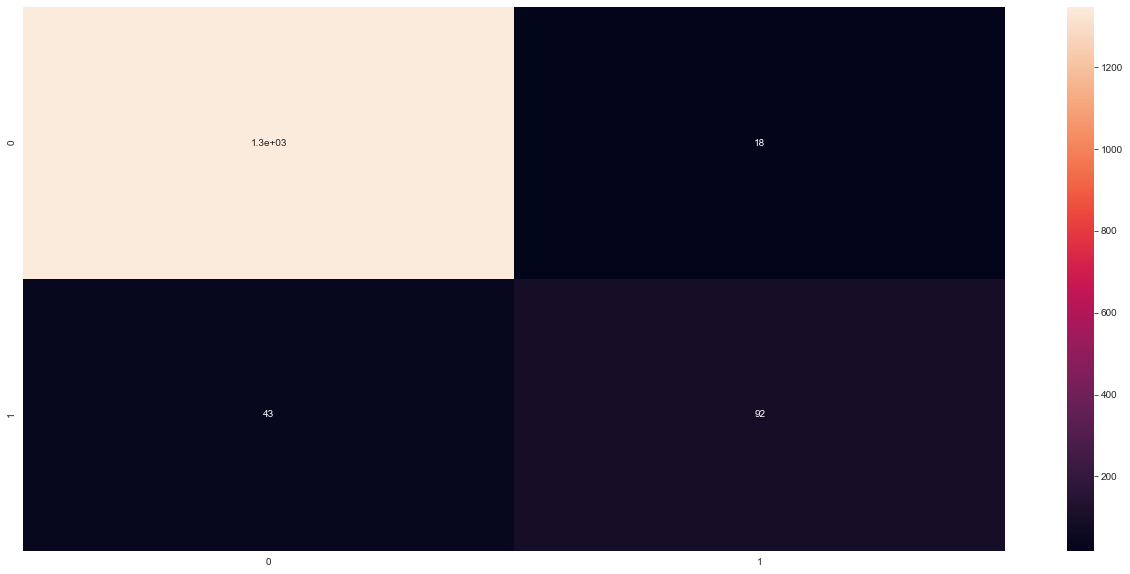

In [253]:
sns.heatmap(cm,annot=True)
plt.show()

In [254]:
LR_acc1 = accuracy_score(y_test, y_pred)
print("Accuracy score for Logistic Regression Model: {:.2f} %".format(LR_acc1*100))

Accuracy score for Logistic Regression Model: 95.93 %


###  ROC Curve

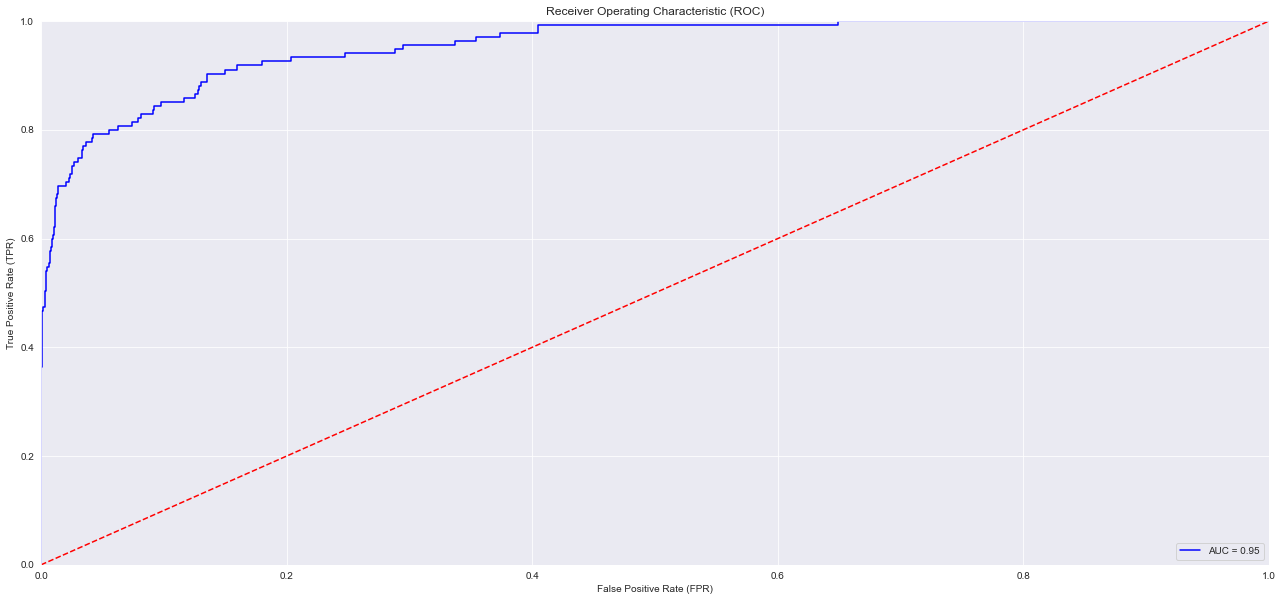

In [255]:
#---find the predicted probabilities using the test set
probs = classifier.predict_proba(X_test)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(y_test, preds)

roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

In [256]:
# By using SMOTE

parameters = [{'penalty': ['l1','l2'], 'C': np.arange(1,10) }]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search.fit(X_train_res, y_train_res)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 94.50 %
Best Parameters: {'C': 7, 'penalty': 'l2'}


# SVM

In [257]:
SVMclassifier = SVC(kernel = 'linear', random_state = 0)
SVMclassifier.fit(X_train, y_train)

y_pred = SVMclassifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1356    9]
 [  44   91]]


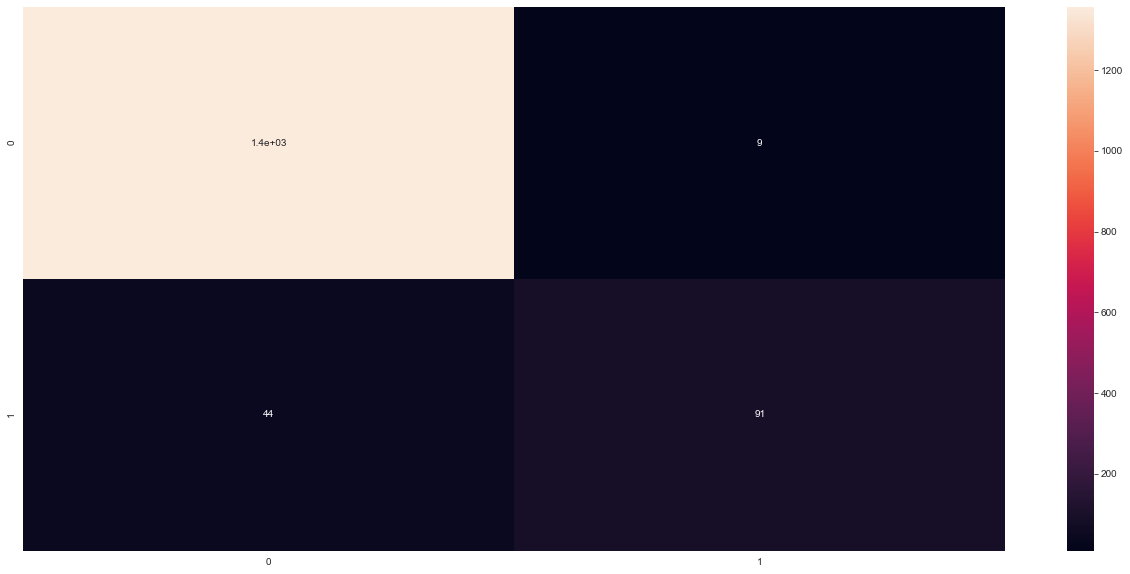

In [258]:
sns.heatmap(cm,annot=True)
plt.show()

In [259]:
SVM_acc1 = accuracy_score(y_test, y_pred)
print("Accuracy score for SVM Model: {:.2f} %".format(SVM_acc1*100))

Accuracy score for SVM Model: 96.47 %


In [260]:
# By using SMOTE

classifier2 = SVC(kernel = 'linear', random_state = 0)
SVM_classifier = classifier2.fit(X_train_res, y_train_res)

y_pred = SVM_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1311   54]
 [  28  107]]


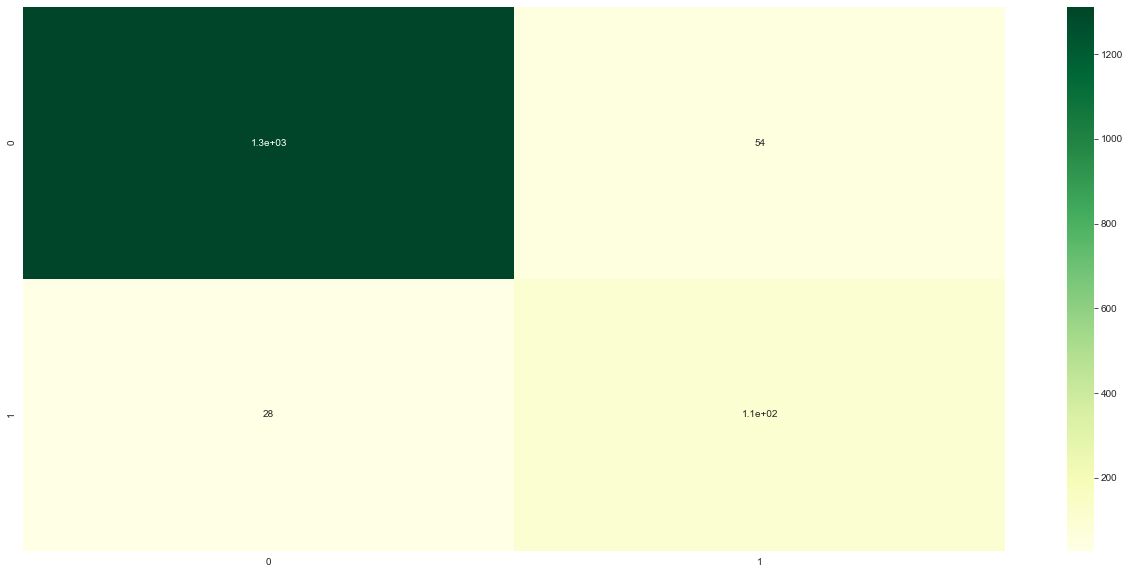

In [273]:
sns.heatmap(cm,cmap="YlGn",annot=True)
plt.show()

In [274]:
SVM_acc2 = accuracy_score(y_test, y_pred)
print("Accuracy score for SVM Model: {:.2f} %".format(SVM_acc2*100))

Accuracy score for SVM Model: 94.53 %


# Hyperparameter Tuning

In [275]:
parameters = [{'C': np.arange(1,10) }]

grid_search = RandomizedSearchCV(estimator = SVMclassifier,
                            param_distributions = parameters,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)

In [276]:
grid_search.fit(X_train_res, y_train_res)
SVM_acc_sorte = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy of SVM: {:.2f} %".format(SVM_acc_sorte*100))
print("Best Parameters of SVM:", best_parameters)

Best Accuracy of SVM: 95.07 %
Best Parameters of SVM: {'C': 9}


#  K-NN

In [277]:
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train, y_train)

y_pred = KNNclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1334   31]
 [  72   63]]


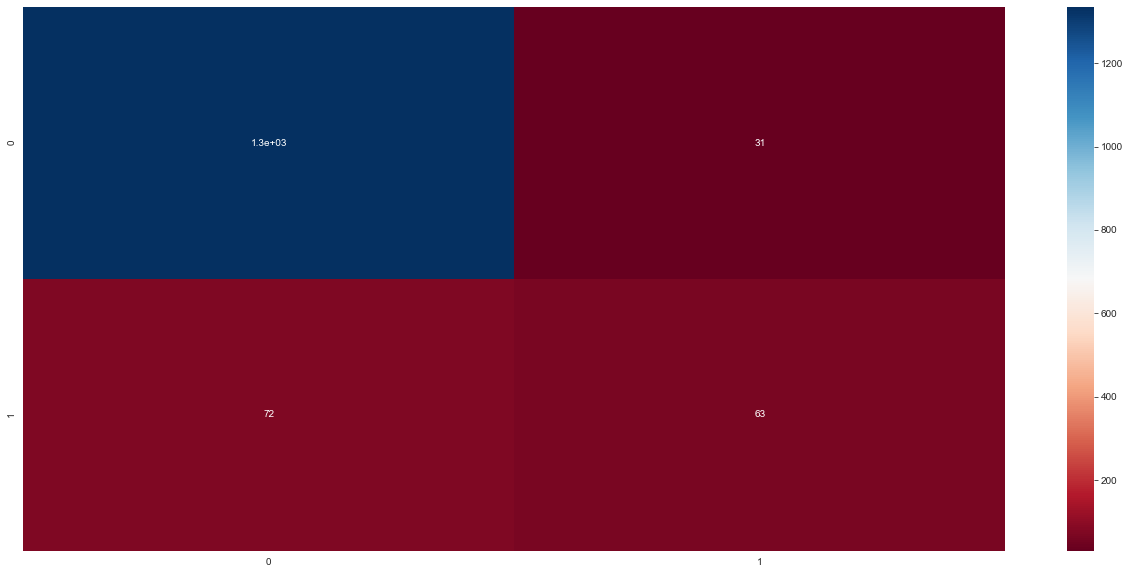

In [278]:
sns.heatmap(cm,cmap = "RdBu",annot=True)
plt.show()

In [279]:
KNN_acc1 = accuracy_score(y_test, y_pred)
print("Best Accuracy of K-NN: {:.2f} %".format(KNN_acc1*100))

Best Accuracy of K-NN: 93.13 %


In [280]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [281]:
y_pred = KNN_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [282]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1241  124]
 [  15  120]]


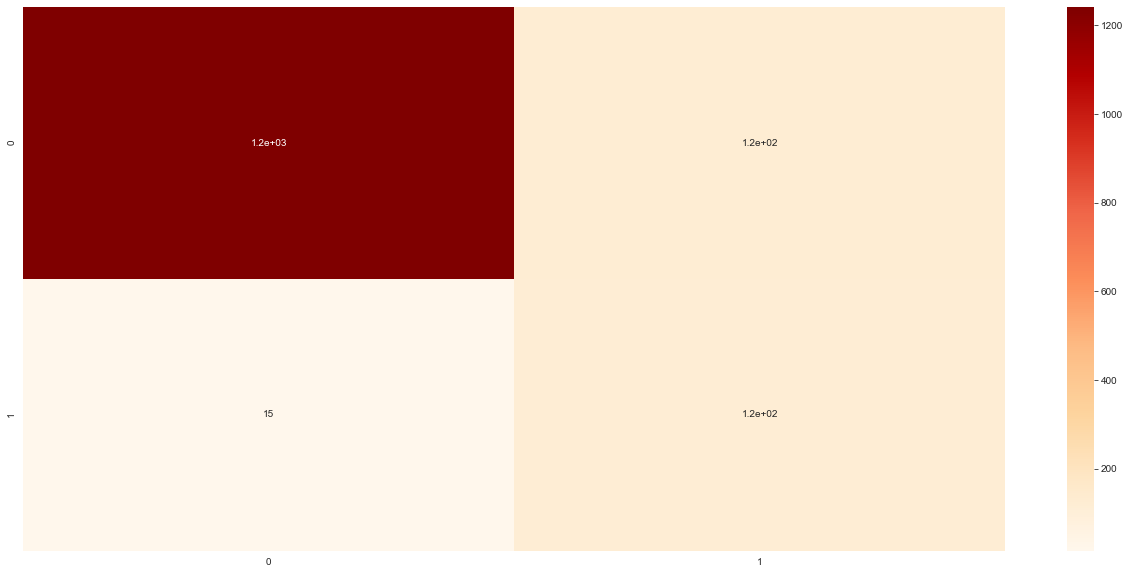

In [285]:
sns.heatmap(cm,cmap = "OrRd",annot=True)
plt.show()

In [286]:
KNN_acc2 = accuracy_score(y_test, y_pred)
print("Best Accuracy of K-NN: {:.2f} %".format(KNN_acc2*100))

Best Accuracy of K-NN: 90.73 %


Hyperparameter Tuning

In [287]:
parameters = [{ 'n_neighbors' :  np.arange(1,10)  }]

grid_search = GridSearchCV(estimator = KNN_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [288]:
grid_search.fit(X_train_res, y_train_res)
KNN_acc3 = grid_search.best_score_
best_parameters3 = grid_search.best_params_

In [289]:
print("Best Accuracy of KNN after Hyperparameter tuning: {:.2f} %".format(KNN_acc3*100))
print("Best Parameters of KNN:", best_parameters3)

Best Accuracy of KNN after Hyperparameter tuning: 96.13 %
Best Parameters of KNN: {'n_neighbors': 1}


# Decision Tree Classifier

In [290]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [291]:
y_pred = DTclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1354   11]
 [  15  120]]


In [292]:
y_pred = classifier.predict(X_test)
DT_acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Decision Tree: {DT_acc1*100}")

Accuracy score for Decision Tree: 95.93333333333334


By using SMOTE

In [293]:
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [294]:
y_pred = DT_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1349   16]
 [   7  128]]


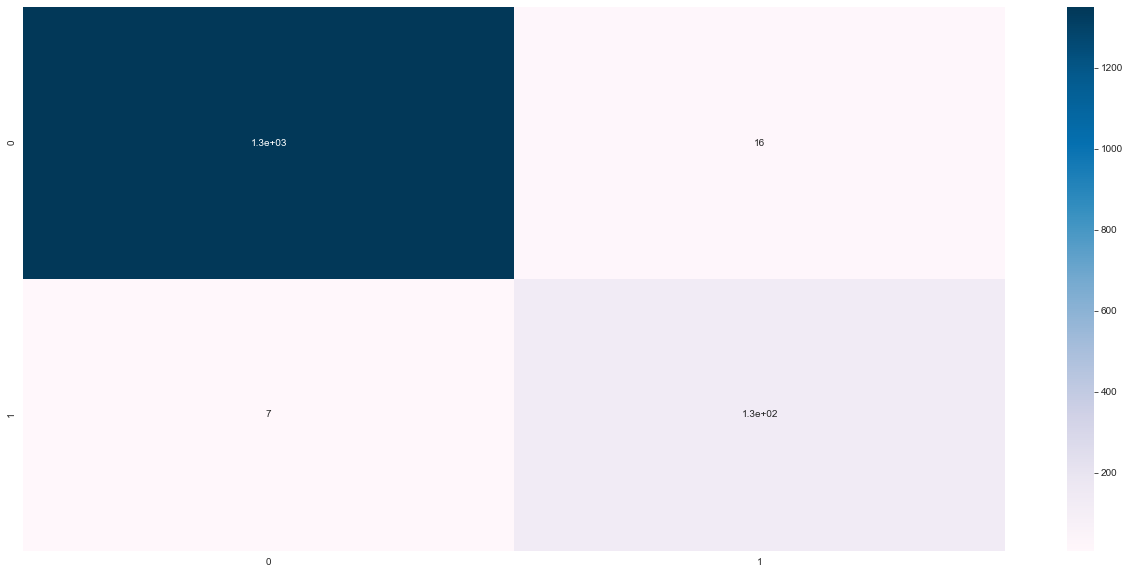

In [297]:
sns.heatmap(cm,cmap= "PuBu",annot=True)
plt.show()

In [298]:
DT_acc2 = accuracy_score(y_test, y_pred)
print("Accuracy score for Decision Tree: {:.2f} %".format(DT_acc2*100))

Accuracy score for Decision Tree: 98.47 %


Hyperparameter Tuning

In [300]:
parameters = [{  }]

grid_search = GridSearchCV(estimator = DT_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [301]:
grid_search.fit(X_train_res, y_train_res)
DT_acc3 = grid_search.best_score_
best_parameters5 = grid_search.best_params_

In [302]:
print("Best Accuracy of Decision Tree Classifier: {:.2f} %".format(DT_acc3*100))
print("Best Parameters of Decision Tree Classifier:", best_parameters5)

Best Accuracy of Decision Tree Classifier: 98.81 %
Best Parameters of Decision Tree Classifier: {}


# Random Forest Classifier

In [303]:
RFclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [304]:
y_pred = RFclassifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1362    3]
 [  24  111]]


In [305]:
RF_acc1 = accuracy_score(y_test, y_pred)
print(f"Random Forest Classification accuracy: {RF_acc1*100}")

Random Forest Classification accuracy: 98.2


In [306]:
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [307]:
y_pred = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1352   13]
 [  13  122]]


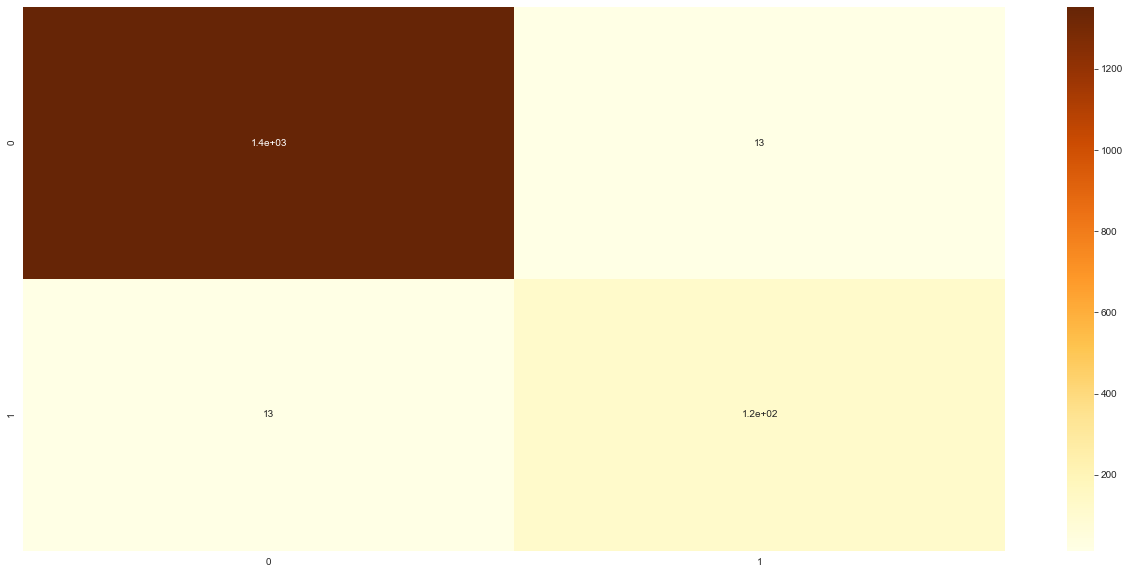

In [309]:
sns.heatmap(cm,cmap="YlOrBr",annot=True)
plt.show()

In [310]:
RF_acc2 = accuracy_score(y_test, y_pred)
print("Accuracy score for Random Forest: {:.2f} %".format(RF_acc2*100))

Accuracy score for Random Forest: 98.27 %


Hyperparameter Tuning

In [311]:
parameters = [{'n_estimators' : [10, 50, 100, 200], 'max_depth' : [3, 10, 20, 40]}]

grid_search = GridSearchCV(estimator = RF_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [312]:
grid_search.fit(X_train_res, y_train_res)
RF_acc3 = grid_search.best_score_
best_parameters6 = grid_search.best_params_

In [313]:
print("Best Accuracy of Random Forest with hyperparameter tuning: {:.2f} %".format(RF_acc3*100))
print("Best Parameters of Random Forest:", best_parameters6)

Best Accuracy of Random Forest with hyperparameter tuning: 99.10 %
Best Parameters of Random Forest: {'max_depth': 20, 'n_estimators': 200}


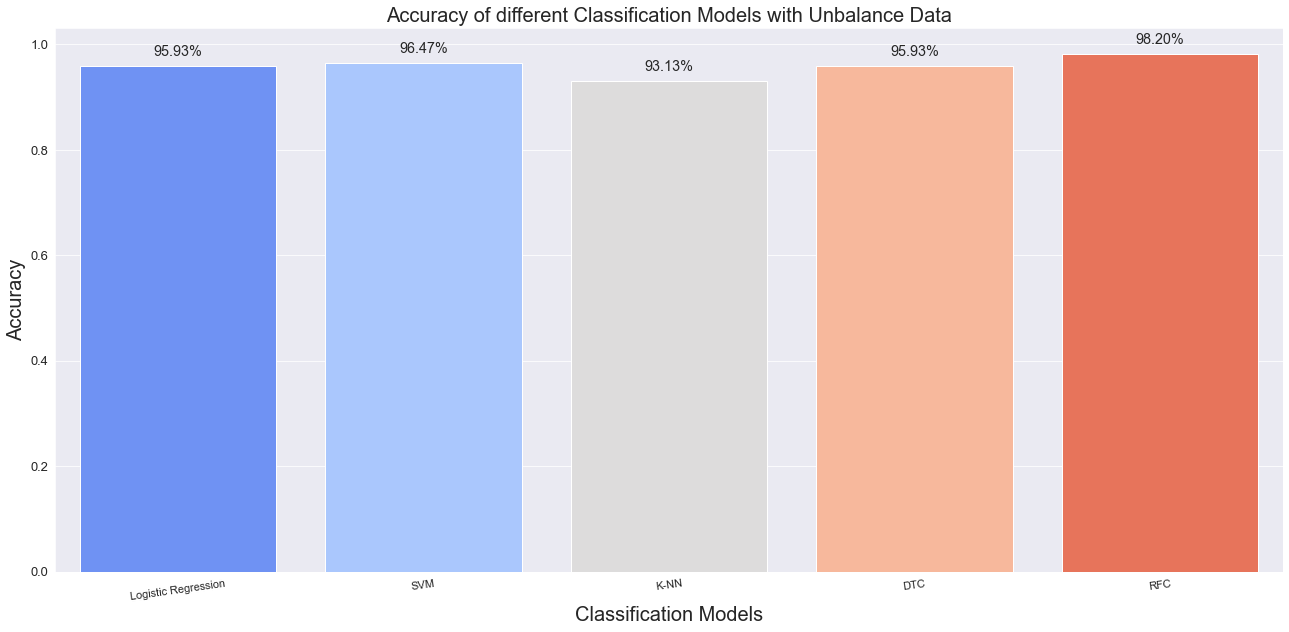

In [314]:
model_list=[]
model_list2=[]
model_list.append(LR_acc1)
model_list2.append("Logistic Regression")
model_list.append(SVM_acc1)
model_list2.append("SVM")
model_list.append(KNN_acc1)
model_list2.append("K-NN")
model_list.append(DT_acc1)
model_list2.append("DTC")
model_list.append(RF_acc1)
model_list2.append("RFC")

plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=model_list2, y=model_list, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models with Unbalance Data", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

To reduce the type-2 error SMOTE and Hyperparameter Tuning will be used for more Accuracy

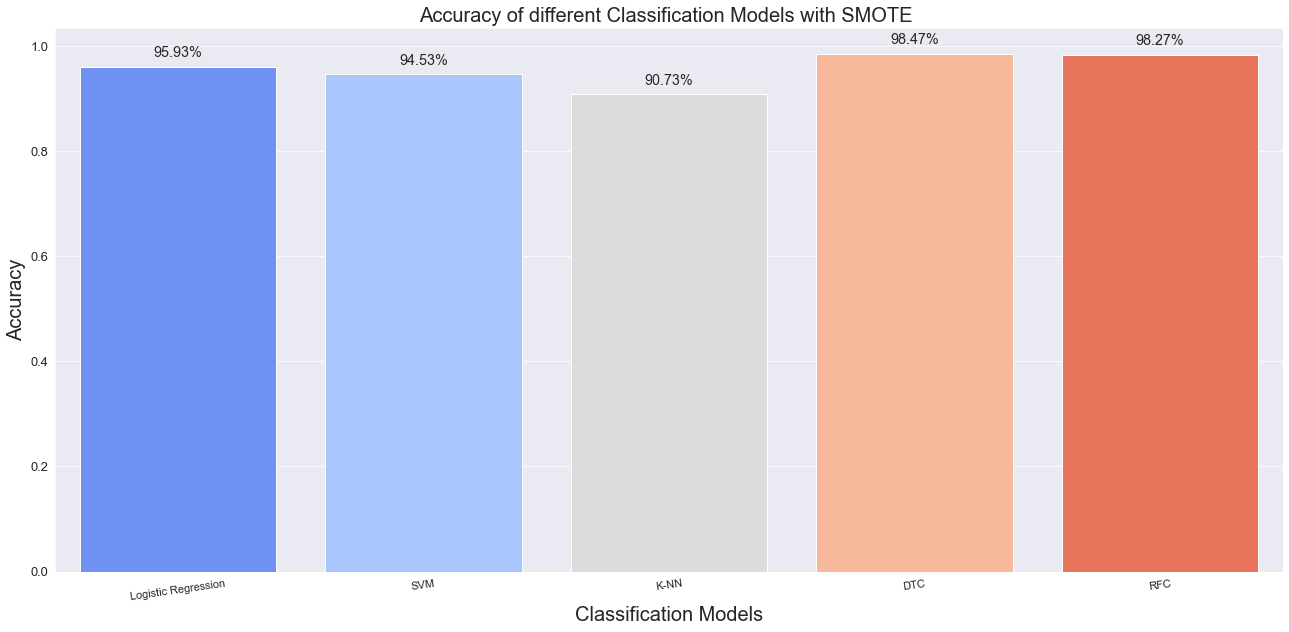

In [315]:
model_list=[]
model_list2=[]
model_list.append(LR_acc1)
model_list2.append("Logistic Regression")
model_list.append(SVM_acc2)
model_list2.append("SVM")
model_list.append(KNN_acc2)
model_list2.append("K-NN")
model_list.append(DT_acc2)
model_list2.append("DTC")
model_list.append(RF_acc2)
model_list2.append("RFC")

plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=model_list2, y=model_list, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models with SMOTE ", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

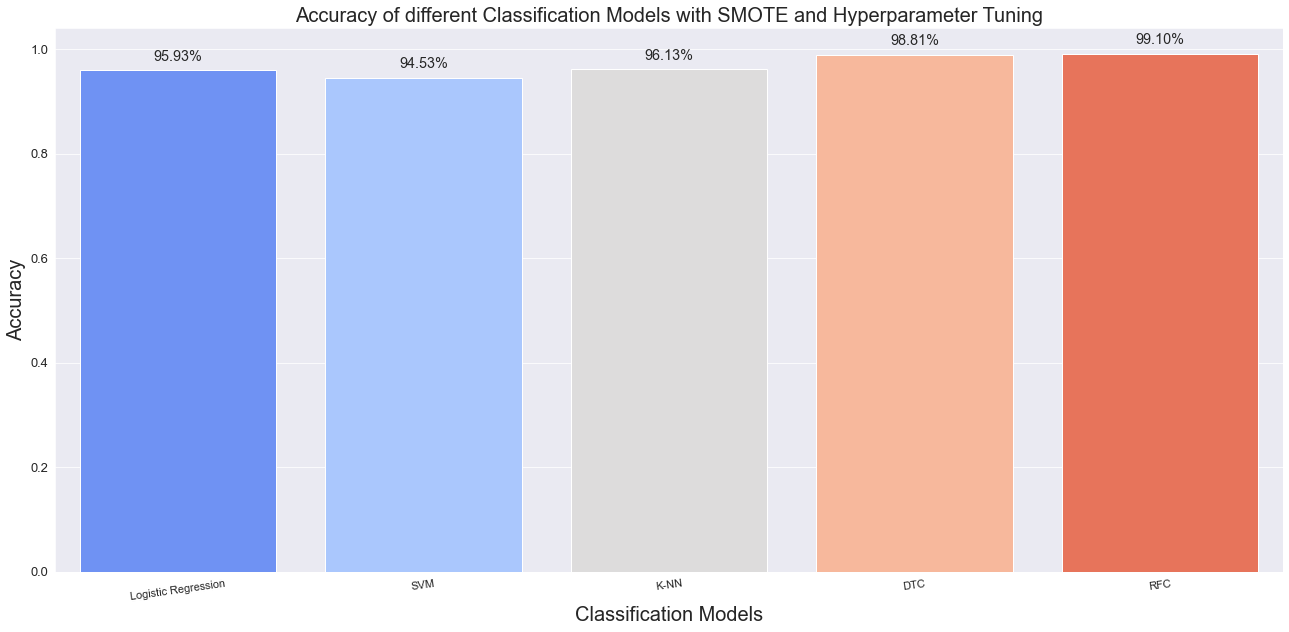

In [316]:
model_list=[]
model_list2=[]
model_list.append(LR_acc1)
model_list2.append("Logistic Regression")
model_list.append(SVM_acc2)
model_list2.append("SVM")
model_list.append(KNN_acc3)
model_list2.append("K-NN")
model_list.append(DT_acc3)
model_list2.append("DTC")
model_list.append(RF_acc3)
model_list2.append("RFC")

plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=model_list2, y=model_list, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models with SMOTE and Hyperparameter Tuning", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Conclusion
#####  Random Forest Classifier s the best algoritham to analyse with Unblance Data, SMOTE and SMOTE with Hyperparameter Tuning .
